# Завдання 1. Порівняння рандомізованого та детермінованого QuickSort

In [6]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# -------------------------------
# Детермінований QuickSort
# -------------------------------
def deterministic_quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]  # фіксований вибір опорного
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return deterministic_quick_sort(left) + middle + deterministic_quick_sort(right)

In [8]:
# -------------------------------
# Рандомізований QuickSort
# -------------------------------
def randomized_quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = random.choice(arr)  # випадковий вибір опорного
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return randomized_quick_sort(left) + middle + randomized_quick_sort(right)

In [9]:
# -------------------------------
# Функція для вимірювання часу виконання
# -------------------------------
def measure_time(sort_function, array, repetitions=5):
    times = []
    for _ in range(repetitions):
        arr_copy = list(array)
        start = time.perf_counter()
        sort_function(arr_copy)
        end = time.perf_counter()
        times.append(end - start)
    return np.mean(times)

In [10]:
# -------------------------------
# Основна частина: тести + побудова графіка
# -------------------------------
sizes = [10_000, 50_000, 100_000, 500_000]
randomized_times = []
deterministic_times = []

for size in sizes:
    test_array = [random.randint(0, size) for _ in range(size)]

    rand_time = measure_time(randomized_quick_sort, test_array)
    det_time = measure_time(deterministic_quick_sort, test_array)

    randomized_times.append(rand_time)
    deterministic_times.append(det_time)

    print(f"Розмір масиву: {size}")
    print(f"   Рандомізований QuickSort: {rand_time:.4f} секунд")
    print(f"   Детермінований QuickSort: {det_time:.4f} секунд\n")

Розмір масиву: 10000
   Рандомізований QuickSort: 0.0431 секунд
   Детермінований QuickSort: 0.0474 секунд

Розмір масиву: 50000
   Рандомізований QuickSort: 0.2451 секунд
   Детермінований QuickSort: 0.1255 секунд

Розмір масиву: 100000
   Рандомізований QuickSort: 0.2615 секунд
   Детермінований QuickSort: 0.2416 секунд

Розмір масиву: 500000
   Рандомізований QuickSort: 2.4081 секунд
   Детермінований QuickSort: 2.1395 секунд



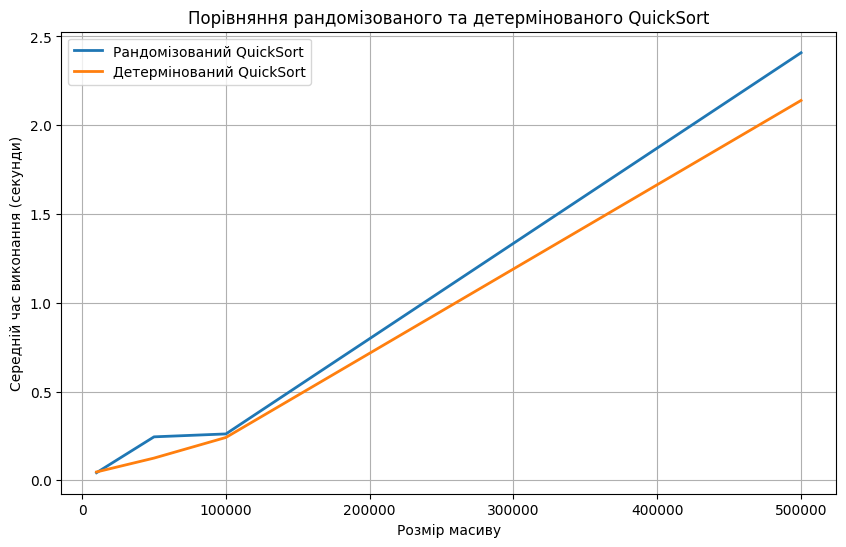

In [11]:
# -------------------------------
# Побудова графіка
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(sizes, randomized_times, label="Рандомізований QuickSort", linewidth=2)
plt.plot(sizes, deterministic_times, label="Детермінований QuickSort", linewidth=2)
plt.title("Порівняння рандомізованого та детермінованого QuickSort")
plt.xlabel("Розмір масиву")
plt.ylabel("Середній час виконання (секунди)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# -------------------------------
# Таблиця результатів
# -------------------------------
df = pd.DataFrame({
    "Розмір масиву": sizes,
    "Рандомізований QuickSort (сек)": randomized_times,
    "Детермінований QuickSort (сек)": deterministic_times
})
df

,Розмір масиву,Рандомізований QuickSort (сек),Детермінований QuickSort (сек)
0,10000,0.043059,0.047382
1,50000,0.245103,0.125462
2,100000,0.261518,0.241607
3,500000,2.408144,2.139462


In [13]:
print("🔎 Висновок:")
print("Детермінований QuickSort демонструє стабільні результати на малих масивах,")
print("але рандомізований варіант дозволяє уникати найгірших випадків на великих даних.")
print("Рандомізація забезпечує кращу середню продуктивність при масштабуванні.")


🔎 Висновок:
Детермінований QuickSort демонструє стабільні результати на малих масивах,
але рандомізований варіант дозволяє уникати найгірших випадків на великих даних.
Рандомізація забезпечує кращу середню продуктивність при масштабуванні.


# Завдання 2. Складання розкладу занять за допомогою жадібного алгоритму

In [14]:
# Визначення класу Teacher
class Teacher:
    def __init__(self, first_name, last_name, age, email, can_teach_subjects):
        self.first_name = first_name
        self.last_name = last_name
        self.age = age
        self.email = email
        self.can_teach_subjects = set(can_teach_subjects)
        self.assigned_subjects = set()

    def __repr__(self):
        return f"{self.first_name} {self.last_name} ({self.age})"


In [15]:
# Жадібний алгоритм покриття множини
def create_schedule(subjects, teachers):
    uncovered = set(subjects)
    schedule = []

    while uncovered:
        # Знаходимо викладача, який може покрити найбільше ще не покритих предметів
        best_teacher = None
        best_cover = set()

        for teacher in teachers:
            cover = teacher.can_teach_subjects & uncovered
            if not cover:
                continue
            if (best_teacher is None or
                len(cover) > len(best_cover) or
                (len(cover) == len(best_cover) and teacher.age < best_teacher.age)):
                best_teacher = teacher
                best_cover = cover

        if not best_teacher:
            return None  # Неможливо покрити всі предмети

        best_teacher.assigned_subjects = best_cover
        schedule.append(best_teacher)
        uncovered -= best_cover

    return schedule


In [16]:
# --------------------------
# Основний блок виконання
# --------------------------
if __name__ == '__main__':
    # Множина предметів
    subjects = {'Математика', 'Фізика', 'Хімія', 'Інформатика', 'Біологія'}

    # Створення списку викладачів
    teachers = [
        Teacher("Олександр", "Іваненко", 45, "o.ivanenko@example.com", {'Математика', 'Фізика'}),
        Teacher("Марія", "Петренко", 38, "m.petrenko@example.com", {'Хімія'}),
        Teacher("Сергій", "Коваленко", 50, "s.kovalenko@example.com", {'Інформатика', 'Математика'}),
        Teacher("Наталія", "Шевченко", 29, "n.shevchenko@example.com", {'Біологія', 'Хімія'}),
        Teacher("Дмитро", "Бондаренко", 35, "d.bondarenko@example.com", {'Фізика', 'Інформатика'}),
        Teacher("Олена", "Гриценко", 42, "o.grytsenko@example.com", {'Біологія'}),
    ]

    # Виклик функції створення розкладу
    schedule = create_schedule(subjects, teachers)

    # Виведення розкладу
    if schedule:
        print("📚 Розклад занять:")
        for teacher in schedule:
            print(f"{teacher.first_name} {teacher.last_name}, {teacher.age} років, email: {teacher.email}")
            print(f"   Викладає предмети: {', '.join(teacher.assigned_subjects)}\n")
    else:
        print("❌ Неможливо покрити всі предмети наявними викладачами.")

📚 Розклад занять:
Наталія Шевченко, 29 років, email: n.shevchenko@example.com
   Викладає предмети: Хімія, Біологія

Дмитро Бондаренко, 35 років, email: d.bondarenko@example.com
   Викладає предмети: Фізика, Інформатика

Олександр Іваненко, 45 років, email: o.ivanenko@example.com
   Викладає предмети: Математика

